In [4]:
import numpy as np
import matplotlib.pylab as plt
import astropy.units as u
from astropy.constants import c
%matplotlib inline

In [18]:
def resolution(Dratio, freq, tau):
    """
    Dratio: Ds/Di, the ratio of the distance to the interstellar screen and to the source
    freq: Observing frequency, astropy unit
    tau: Scattering timescale of observation, astropy unit
    """
    
    theta = 14.* (freq / (325*u.MHz))**(-1.66) # From Rudnitskii 2016
    theta = theta.value / (206264.806247 * 1000) # Converison to radians
    
    lam = (c/freq).decompose()
    
    print lam, theta, tau
    
    Dls = ( (lam/theta) * (Dratio-1) )**2.0 / (2*c*tau)
    
    return Dls.to(u.pc)

In [20]:
freq = 800*u.MHz
tau = 50*u.microsecond

Dratio = 2.

res = resolution(Dratio, freq, tau)

print res

0.3747405725 m 1.52159791089e-08 50.0 us
6.55677645329e-07 pc


0.3747405725 m 1.52159791089e-08 50.0 us
0.181692398788 m 4.5751562892e-09 5.0 us
0.181692398788 m 4.5751562892e-09 1.0 us


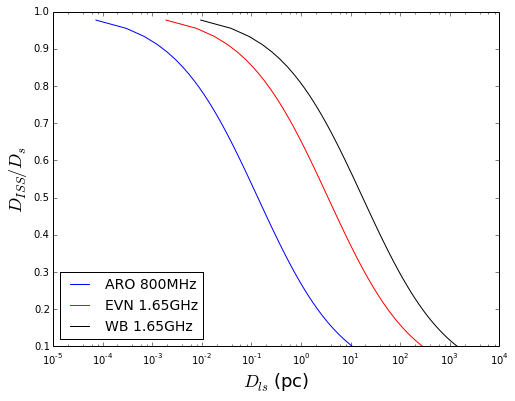

In [47]:
""" ARO 800MHz constraints """

Dratio = np.logspace(0.01, 1, 100)

tauARO = 50*u.microsecond
freqARO = 800*u.MHz
DlsARO = resolution(Dratio, freqARO, tauARO)

""" EVN 1.6GHz constraints """

tauEVN = 5*u.microsecond
freqEVN = 1650*u.MHz
DlsEVN = resolution(Dratio, freqEVN, tauEVN)

""" Wb 1.6GHz constaints """

tauWB = 1.*u.microsecond
freqWB = 1650*u.MHz
DlsWB = resolution(Dratio, freqWB, tauWB)

""" Plotting """

plt.figure(figsize=(8,6))

plt.plot(DlsARO.to(u.au), 1/Dratio, 'b', label='ARO 800MHz')
plt.plot(DlsEVN.to(u.au), 1/Dratio, 'r', label='EVN 1.65GHz')
plt.plot(DlsWB.to(u.au), 1/Dratio, 'k', label='WB 1.65GHz')

plt.xscale('log')
#plt.yscale('log')

plt.xlabel(r'$D_{ls}$ (pc)', fontsize=18)
plt.ylabel(r'$D_{ISS} / D_{s}$', fontsize=18)

plt.legend(fontsize=14, loc=3)